## Netflix Data Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## read the data in netflex

In [43]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## data cleaning

In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8709 non-null   float64       
 13  month_added   8709 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1.3+ MB


## Describe


In [56]:
df.describe()


,date_added,release_year,year_added,month_added
count,8709,8797.000000,8709.000000,8709.000000
mean,2019-05-23 01:45:29.452290560,2014.183472,2018.887932,6.653347
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-20 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-12 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-26 00:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.822191,1.567961,3.431434


## Tolat Null Value

In [57]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      88
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      88
month_added     88
dtype: int64

## fill unknown data


In [45]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


## Drop rows where essential fields are missing

In [46]:
## It removes rows from the DataFrame df where the date_added column has missing (NaN) values.
df.dropna(subset=['date_added'], inplace=True)

In [47]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['release_year'] = df['release_year'].astype(int)

## Movies vs TV Shows

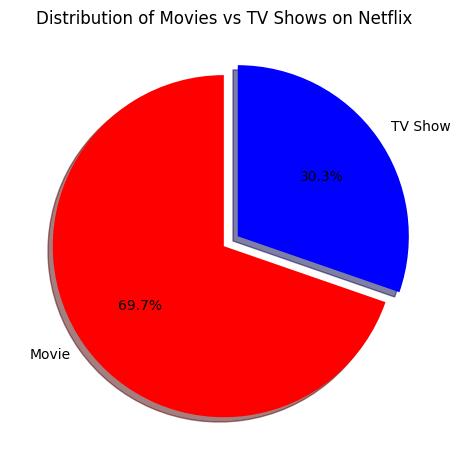

In [ ]:
show_count = df['type'].value_counts()

colors = ['red', 'blue']
explode = [0, 0.1]

show_count.plot(kind='pie',colors=colors,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.ylabel('')  
plt.tight_layout()
plt.savefig('movie_vs_tv_show_distribution.pdf')



## number of show relese per year

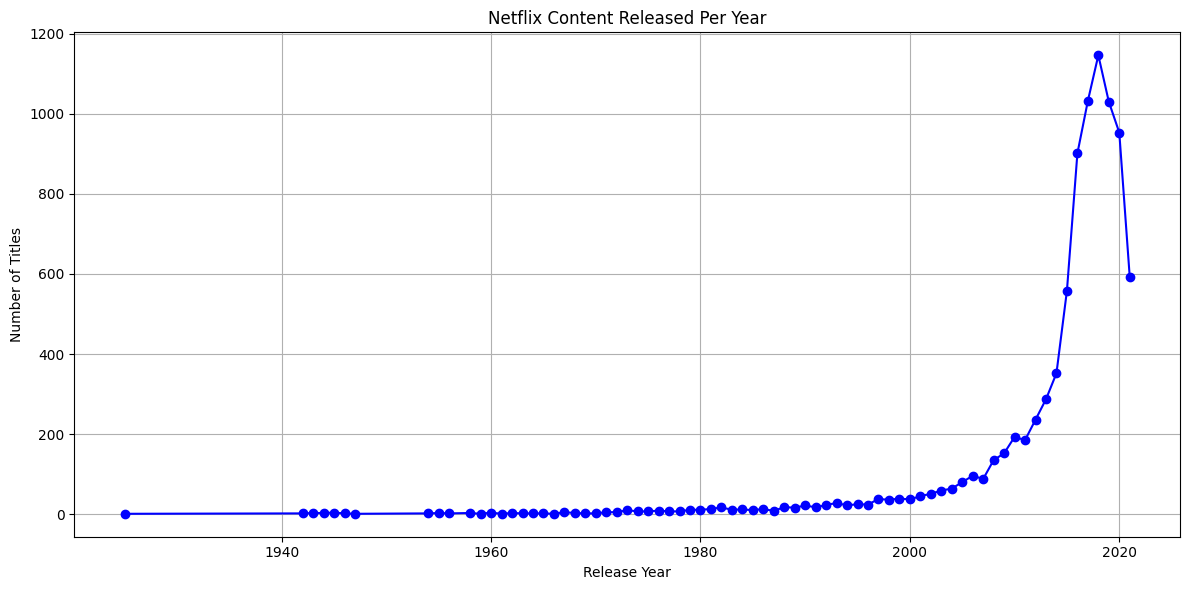

In [ ]:
show_per_year = df.groupby('release_year')['title'].count()

fig, ax = plt.subplots(figsize=(12, 6))  # Set appropriate size

show_per_year.plot(kind='line', marker='o', ax=ax, color='blue')

plt.ylabel('Number of Titles')
plt.xlabel('Release Year')
plt.title('Netflix Content Released Per Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('netflix_content_per_year.pdf')


## Top countries producing content on Netflix

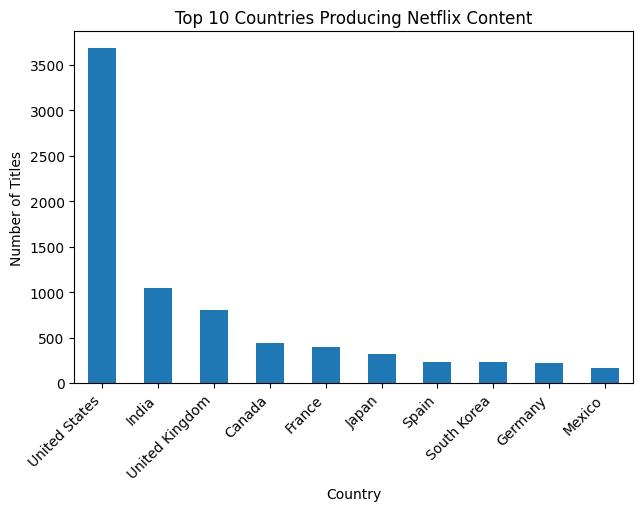

In [61]:
country_split = df['country'].str.split(',', expand=True)
all_countries = country_split.stack().str.strip().value_counts()
all_countries = all_countries.drop('Unknown', errors='ignore')
top_countries = all_countries.head(10)
top_countries.plot(kind='bar',color = '#1f77b4')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Producing Netflix Content')
plt.savefig('top_10_countries_netflix.pdf')

## number of show per year

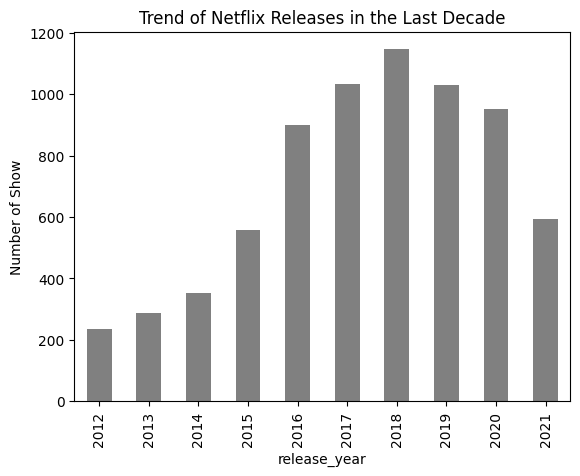

In [ ]:
no = df.groupby('release_year')['title'].count()
no_of_show = no.tail(10)
no_of_show.plot(kind='bar',color = 'gray')
plt.ylabel('Number of Shows')
plt.title('Trend of Netflix Releases in the Last Decade')
plt.savefig('number of show per year.pdf')

## Top 10 Most Featured Directors on Netflix

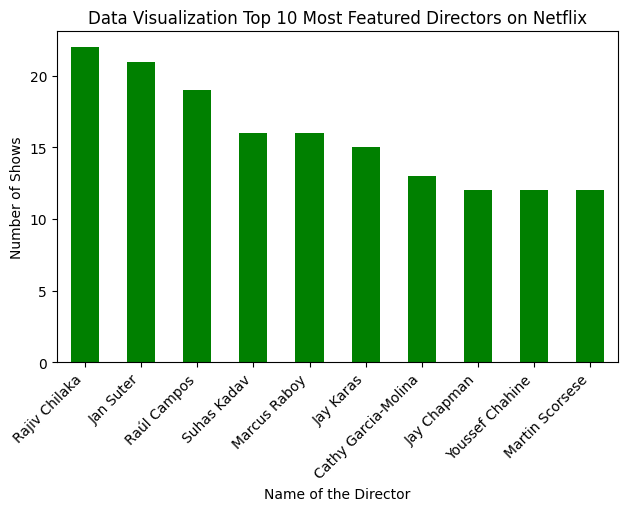

In [59]:
diractor_split = df['director'].str.split(',', expand=True)
all_diractor = diractor_split.stack().str.strip().value_counts().drop('Unknown')
top_director = all_diractor.head(10)
top_director.plot(kind='bar',color='green')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlabel('Name of the Director')
plt.ylabel('Number of Shows')
plt.title('Data Visualization Top 10 Most Featured Directors on Netflix')
plt.savefig('Top_Ten_Most_Frequent_Diractor.pdf')